In [87]:
import numpy as np 
import matplotlib.pyplot as plt 
import uncertainties as unc
import pandas as pd
import uncertainties.unumpy as unp
from matplotlib import cm
import matplotlib.colors as col
from lmfit.models import ExponentialModel, GaussianModel
from matplotlib import cm

data1nm = pd.read_csv('data1nm.csv')
data5nm = pd.read_csv('data5nm.csv')
data10nm = pd.read_csv('data10nm.csv')
data15nm = pd.read_csv('data15nm.csv')
data20nm = pd.read_csv('data20nm.csv')
data25nm = pd.read_csv('data25nm.csv')
data30nm = pd.read_csv('data30nm.csv')

fine1nm = pd.read_csv('fine1nm.csv')
fine5nm = pd.read_csv('fine5nm.csv')
fine10nm = pd.read_csv('fine10nm.csv')
fine15nm = pd.read_csv('fine15nm.csv')
fine20nm = pd.read_csv('fine20nm.csv')
fine25nm = pd.read_csv('fine25nm.csv')
fine30nm = pd.read_csv('fine30nm.csv')

In [88]:
def plot3dVacancy(DEPTH,data,thickness,lab, ax):
    model1 = GaussianModel()
    model = model1
    params = model.make_params()

    params['amplitude'].set(value = 2e8, vary=True)
    params['center'].set(value = 0, vary=True)
    params['sigma'].set(value = 7.5, vary=True)
    model_fit = model.fit(data, params, x=DEPTH)
    fit_x = np.linspace(0,np.array(DEPTH)[-1],1000)
    fitcurve = model_fit.eval(model_fit.params, x = fit_x)
    # if lab == 0:
        # plt.scatter(DEPTH, data, zs=thickness, zdir='y', marker = '^',  color = 'k', s = 5, )
    ax.plot(fit_x, fitcurve,  linestyle = '--', lw = 2)
    # else:
    #     # plt.scatter(DEPTH, data, zs=thickness, zdir='y', marker = '.', label = 'Carbon Vacancy Distribution Data', color = 'k', s = 1)
    #     ax.plot(fit_x, fitcurve,  linestyle = '--', label = 'Carbon Vacancy Distribution', lw = 3)
    
    ax.fill_between(fit_x, 0, fitcurve, step='mid', alpha=0.1) 

    # if lab == 0:
    #     # plt.scatter(DEPTH, data, zs=thickness, zdir='y', marker = '^',  color = 'k', s = 5, )
    #     plt.plot(DEPTH, data,  linestyle = '--', lw = 1.3)
    # else:
    #     # plt.scatter(DEPTH, data, zs=thickness, zdir='y', marker = '.', label = 'Carbon Vacancy Distribution Data', color = 'k', s = 1)
    #     plt.plot(DEPTH, data,   linestyle = '--', label = 'Carbon Vacancy Distribution', lw = 1.3)
    
    # plt.fill_between(DEPTH, 0, data, step='mid', alpha=0.1) 

In [89]:
def plot3dSilicon(DEPTH,data,thickness,c, ax):
        ax.plot(DEPTH, data, lw = 2, color = c)
        # ax.plot(DEPTH, data, lw = 2.5, color = 'aqua')

In [90]:
def plot3dSilicon1(DEPTH,data,thickness,c):
        plt.plot(DEPTH, data, lw = 2, color = c, label = thickness)
        plt.yscale('log')
        # plt.plot(DEPTH, data, lw = 2, color = 'aqua')

In [91]:
def plot3dGallium(depth,data,thickness,c,ax):
    model1 = GaussianModel() 
    model = model1
    params = model.make_params()

    params['amplitude'].set(value = 1e6, vary=True)
    params['center'].set(value = 10, vary=True)
    params['sigma'].set(value = 3, vary=True)
    model_fit = model.fit(data, params, x=depth)
    fit_x = np.linspace(0,80,1000)
    fitcurve = model_fit.eval(model_fit.params, x = fit_x)

    ax.plot(fit_x, fitcurve, lw = 2, color = c, linestyle = '-.',label = str(thickness)+' nm')
    # plt.plot(fit_x, fitcurve, lw = 1, color = 'k', label = 'Gallium Ion Distribution')

    # if lab == 0:
    #     plt.plot(depth, data, lw = 1, color = 'k')
    # else:
    #     plt.plot(depth, data, lw = 1, color = 'k', label = 'Gallium Ion Distribution')

In [92]:
cmap = cm.cool  # You can choose a different colormap
colors = [cmap(i / 7) for i in range(7)]

cmap = cm.gray # You can choose a different colormap
colors2 = [cmap(i / 7) for i in range(7)]

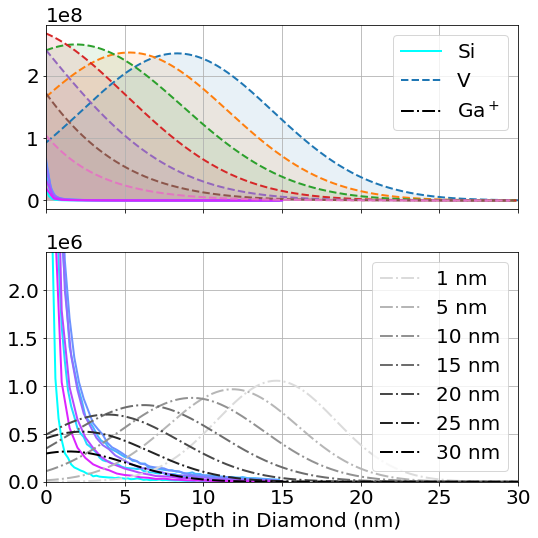

In [93]:
plt.rcParams.update({'font.size': 20})
cm = 1/2.54 
fig, axs = plt.subplots(2,1,figsize=(20*cm, 20*cm), sharex=True, gridspec_kw={'height_ratios': [4, 5]})
# fig, axs = plt.subplots(2,1,figsize=(5,5), sharex=True, gridspec_kw={'height_ratios': [4, 5]})
axs[0].grid()
# axs[0].set_xlim(0, 80)
# axs[0].set_xlabel('Depth in Diamond (nm)')
# axs[0].set_ylabel('Density per Dose ($cm^{-3}$/$cm^{-2}$)')
# fig.text(0.0, 0.5, 'Density per Dose ($cm^{-3}$/$cm^{-2}$)', va='center', rotation='vertical')

# plot3dSilicon(fine10keV['DEPTH'],fine10keV['Si'], 10, colors[0], axs[0])
# plot3dSilicon(fine30keV['DEPTH'],fine30keV['Si'], 30,colors[1], axs[0])
# plot3dSilicon(fine50keV['DEPTH'],fine50keV['Si'],50,colors[2], axs[0])
# plot3dSilicon(fine70keV['DEPTH'],fine70keV['Si'], 70,colors[3], axs[0])
# plot3dSilicon(fine90keV['DEPTH'],fine90keV['Si'], 90,colors[4], axs[0])


# plot3dVacancy(data10keV['DEPTH'][1:],data10keV['C'][1:]*1e8, 10,1, axs[0])
# plot3dVacancy(data30keV['DEPTH'],data30keV['C']*1e8, 30,0, axs[0])
# plot3dVacancy(data50keV['DEPTH'][4:],data50keV['C'][4:]*1e8,50,0, axs[0])
# plot3dVacancy(data70keV['DEPTH'][1:],data70keV['C'][1:]*1e8, 70,0, axs[0])
# plot3dVacancy(data90keV['DEPTH'][2:],data90keV['C'][2:]*1e8, 90,0, axs[0])
plot3dSilicon(fine1nm['DEPTH'],fine1nm['Si'], 1,colors[0], axs[0])
plot3dSilicon(fine5nm['DEPTH'],fine5nm['Si'], 5,colors[1], axs[0])
plot3dSilicon(fine10nm['DEPTH'],fine10nm['Si'],10,colors[2], axs[0])
plot3dSilicon(fine15nm['DEPTH'],fine15nm['Si'], 15,colors[3], axs[0])
plot3dSilicon(fine20nm['DEPTH'],fine20nm['Si'], 20,colors[4], axs[0])
plot3dSilicon(fine25nm['DEPTH'],fine25nm['Si'], 25,colors[5], axs[0])
plot3dSilicon(fine30nm['DEPTH'],fine30nm['Si'], 30,colors[6], axs[0])


plot3dVacancy(data1nm['DEPTH'][1:],data1nm['C'][1:]*1e8, 1,1, axs[0])
plot3dVacancy(data5nm['DEPTH'][1:],data5nm['C'][1:]*1e8, 5,0, axs[0])
plot3dVacancy(data10nm['DEPTH'][1:],data10nm['C'][1:]*1e8,10,0, axs[0])
plot3dVacancy(data15nm['DEPTH'][1:],data15nm['C'][1:]*1e8, 15,0, axs[0])
plot3dVacancy(data20nm['DEPTH'][1:],data20nm['C'][1:]*1e8, 20,0, axs[0])
plot3dVacancy(data25nm['DEPTH'][1:],data25nm['C'][1:]*1e8, 25,0, axs[0])
plot3dVacancy(data30nm['DEPTH'][1:],data30nm['C'][1:]*1e8, 30,0, axs[0])

axs[0].plot([],[],lw = 2, color = 'aqua', label = 'Si')
axs[0].plot([],[],lw = 2, color = 'C0', linestyle = '--',label = 'V')
axs[0].plot([],[],lw = 2, color = 'k', linestyle = '-.',label = 'Ga$^+$')
axs[0].legend()

axs[1].grid()
axs[1].set_xlim(0, 30)
axs[1].set_ylim(0, 2.4e6)
axs[1].set_xlabel('Depth in Diamond (nm)')
# axs[1].set_ylabel('Density per Dose ($cm^{-3}$/$cm^{-2}$)')

# plot3dVacancy(data10keV['DEPTH'][1:],data10keV['C'][1:]*1e8, 10,1, axs[1])
# plot3dVacancy(data30keV['DEPTH'],data30keV['C']*1e8, 30,0, axs[1])
# plot3dVacancy(data50keV['DEPTH'][4:],data50keV['C'][4:]*1e8,50,0, axs[1])
# plot3dVacancy(data70keV['DEPTH'][1:],data70keV['C'][1:]*1e8, 70,0, axs[1])
# plot3dVacancy(data90keV['DEPTH'][2:],data90keV['C'][2:]*1e8, 90,0, axs[1])

# plot3dSilicon(fine10keV['DEPTH'],fine10keV['Si'], 10, colors[0], axs[1])
# plot3dSilicon(fine30keV['DEPTH'],fine30keV['Si'], 30,colors[1], axs[1])
# plot3dSilicon(fine50keV['DEPTH'],fine50keV['Si'],50,colors[2], axs[1])
# plot3dSilicon(fine70keV['DEPTH'],fine70keV['Si'], 70,colors[3], axs[1])
# plot3dSilicon(fine90keV['DEPTH'],fine90keV['Si'], 90,colors[4], axs[1])

# plot3dGallium(data10keV['DEPTH'],data10keV['Ga'], 10,colors2[0], axs[1])
# plot3dGallium(data30keV['DEPTH'],data30keV['Ga'], 30,colors2[1], axs[1])
# plot3dGallium(data50keV['DEPTH'],data50keV['Ga'],50,colors2[2], axs[1])
# plot3dGallium(data70keV['DEPTH'],data70keV['Ga'], 70,colors2[3], axs[1])
# plot3dGallium(data90keV['DEPTH'],data90keV['Ga'], 90,colors2[4], axs[1])

plot3dSilicon(fine1nm['DEPTH'],fine1nm['Si'], 1, colors[0], axs[1])
plot3dSilicon(fine5nm['DEPTH'],fine5nm['Si'], 5, colors[1], axs[1])
plot3dSilicon(fine10nm['DEPTH'],fine10nm['Si'],10, colors[2], axs[1])
plot3dSilicon(fine15nm['DEPTH'],fine15nm['Si'], 15, colors[3], axs[1])
plot3dSilicon(fine20nm['DEPTH'],fine20nm['Si'], 20, colors[4], axs[1])
plot3dSilicon(fine25nm['DEPTH'],fine25nm['Si'], 25, colors[5], axs[1])
plot3dSilicon(fine30nm['DEPTH'],fine30nm['Si'], 30, colors[6], axs[1])


plot3dGallium(data1nm['DEPTH'],data1nm['Ga'], 1, colors2[6], axs[1])
plot3dGallium(data5nm['DEPTH'],data5nm['Ga'], 5, colors2[5], axs[1])
plot3dGallium(data10nm['DEPTH'],data10nm['Ga'],10, colors2[4], axs[1])
plot3dGallium(data15nm['DEPTH'],data15nm['Ga'], 15, colors2[3], axs[1])
plot3dGallium(data20nm['DEPTH'],data20nm['Ga'], 20, colors2[2], axs[1])
plot3dGallium(data25nm['DEPTH'],data25nm['Ga'], 25, colors2[1], axs[1])
plot3dGallium(data30nm['DEPTH'],data30nm['Ga'], 30, colors2[0], axs[1])

axs[1].legend()
fig.tight_layout()


fig.savefig('fffffffff.pdf', format= 'pdf')